# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer Vision is the practice of writing algorithms which can discover patterns in visual data.Such as the camera of a self driving car recognizing the car in front

## Get the data

The images we are working with are from the Fodd 101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we have modified it to only use two classes (pizza and steak) using the image dta modification notebook

> **Note:** We start with a smaller dataset so we can expriment quickly and figure what works(or better yet what does'nt work)
before scaling up

In [2]:
import zipfile

# Unzip the downloaded file
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

## Inspect the data(become one with the data)

A very crucial step at the beginning of any machine learning project is becoming one with the data

And for the computer vision project .. this usually means visulaizing mnay samples of our data

In [3]:
import os
os.listdir("pizza_steak")

['test', 'train']

In [4]:
os.listdir("pizza_steak/train")

['pizza', 'steak']

In [5]:
os.listdir("pizza_steak/train/pizza")

['1008104.jpg',
 '1008144.jpg',
 '1008844.jpg',
 '1008941.jpg',
 '1011404.jpg',
 '102037.jpg',
 '1026922.jpg',
 '1029698.jpg',
 '1033251.jpg',
 '1035854.jpg',
 '1038357.jpg',
 '1040878.jpg',
 '1044524.jpg',
 '1044789.jpg',
 '1047561.jpg',
 '1048649.jpg',
 '1054420.jpg',
 '1055065.jpg',
 '105910.jpg',
 '1065078.jpg',
 '1069629.jpg',
 '1075568.jpg',
 '1076699.jpg',
 '1083380.jpg',
 '1084888.jpg',
 '1088332.jpg',
 '1089334.jpg',
 '1097980.jpg',
 '1098197.jpg',
 '1105700.jpg',
 '1107714.jpg',
 '111051.jpg',
 '1110966.jpg',
 '1123386.jpg',
 '1137400.jpg',
 '1138936.jpg',
 '1143057.jpg',
 '1157438.jpg',
 '1159797.jpg',
 '1165451.jpg',
 '1173913.jpg',
 '1183278.jpg',
 '1202925.jpg',
 '1205154.jpg',
 '1207213.jpg',
 '1209973.jpg',
 '121834.jpg',
 '12301.jpg',
 '1234172.jpg',
 '1243215.jpg',
 '1245628.jpg',
 '1247645.jpg',
 '1248346.jpg',
 '1248478.jpg',
 '1260554.jpg',
 '1267359.jpg',
 '1269960.jpg',
 '1270986.jpg',
 '12718.jpg',
 '1284978.jpg',
 '1285298.jpg',
 '1287004.jpg',
 '1289139.jpg',


In [6]:
# Walk through the pizza_steak directory and list number of files
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}")

There are 2 directories and 0 images in 'pizza_steak
There are 2 directories and 0 images in 'pizza_steak\test
There are 0 directories and 250 images in 'pizza_steak\test\pizza
There are 0 directories and 250 images in 'pizza_steak\test\steak
There are 2 directories and 0 images in 'pizza_steak\train
There are 0 directories and 750 images in 'pizza_steak\train\pizza
There are 0 directories and 750 images in 'pizza_steak\train\steak


In [7]:
# Another way to find out how many images are in each directory
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

> To visualize our images,first let's get our class names programmatically

In [8]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
# Create a list of class names from sub directories
print(class_names)

['pizza' 'steak']


In [44]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
    # Set up the target directory(we'll view images form here)
    target_folder=target_dir+target_class

    # Get a random image path
    random_image=random.sample(os.listdir(target_folder),1)
    print(random_image)

    # Read in the image and plot it using matplotlib
    img=mpimg.imread(target_folder+"/"+ random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape:{img.shape}") # show the shape of the image

    return img

['2078141.jpg']
Image shape:(512, 306, 3)


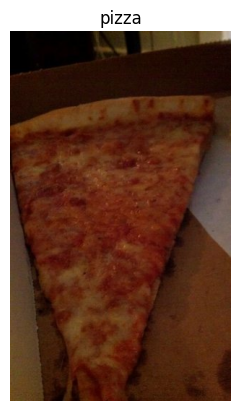

In [45]:
# View a random image from training dataset
img=view_random_image(target_dir="pizza_steak/train/",target_class="pizza")

In [11]:
img,img.dtype

(array([[[158, 135, 104],
         [163, 140, 109],
         [153, 130,  99],
         ...,
         [240, 194, 144],
         [237, 191, 139],
         [235, 189, 137]],
 
        [[142, 119,  88],
         [141, 118,  87],
         [135, 112,  81],
         ...,
         [241, 195, 145],
         [241, 195, 143],
         [240, 194, 142]],
 
        [[132, 106,  79],
         [129, 103,  76],
         [129, 104,  74],
         ...,
         [244, 198, 148],
         [246, 200, 150],
         [248, 202, 152]],
 
        ...,
 
        [[228, 222, 206],
         [227, 221, 205],
         [231, 226, 207],
         ...,
         [232, 191, 135],
         [236, 193, 138],
         [240, 197, 142]],
 
        [[228, 222, 206],
         [226, 220, 204],
         [230, 225, 206],
         ...,
         [230, 189, 135],
         [235, 192, 139],
         [241, 198, 145]],
 
        [[228, 222, 206],
         [226, 220, 204],
         [229, 224, 205],
         ...,
         [228, 187, 133],
  

In [12]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[158, 135, 104],
        [163, 140, 109],
        [153, 130,  99],
        ...,
        [240, 194, 144],
        [237, 191, 139],
        [235, 189, 137]],

       [[142, 119,  88],
        [141, 118,  87],
        [135, 112,  81],
        ...,
        [241, 195, 145],
        [241, 195, 143],
        [240, 194, 142]],

       [[132, 106,  79],
        [129, 103,  76],
        [129, 104,  74],
        ...,
        [244, 198, 148],
        [246, 200, 150],
        [248, 202, 152]],

       ...,

       [[228, 222, 206],
        [227, 221, 205],
        [231, 226, 207],
        ...,
        [232, 191, 135],
        [236, 193, 138],
        [240, 197, 142]],

       [[228, 222, 206],
        [226, 220, 204],
        [230, 225, 206],
        ...,
        [230, 189, 135],
        [235, 192, 139],
        [241, 198, 145]],

       [[228, 222, 206],
        [226, 220, 204],
        [229, 224, 205],
        ...,
        [228, 187, 13

In [13]:
# View the image shape
img.shape # returns the width,height ,color channels

(512, 512, 3)

> **Note:** As we've discussed before,many machine learning models,including neural networks prefer the values they work with to be between 0 and 1.Knowing this one of the most common preprocessing steps for working with images is to scale(also reffered to as *normalise*) their pixed values by diving the image by 255.(since 255 is the maximum pixel value).

In [14]:
# Get all the pixel values betwwen 0 and 1
img/float(255)

array([[[0.61960784, 0.52941176, 0.40784314],
        [0.63921569, 0.54901961, 0.42745098],
        [0.6       , 0.50980392, 0.38823529],
        ...,
        [0.94117647, 0.76078431, 0.56470588],
        [0.92941176, 0.74901961, 0.54509804],
        [0.92156863, 0.74117647, 0.5372549 ]],

       [[0.55686275, 0.46666667, 0.34509804],
        [0.55294118, 0.4627451 , 0.34117647],
        [0.52941176, 0.43921569, 0.31764706],
        ...,
        [0.94509804, 0.76470588, 0.56862745],
        [0.94509804, 0.76470588, 0.56078431],
        [0.94117647, 0.76078431, 0.55686275]],

       [[0.51764706, 0.41568627, 0.30980392],
        [0.50588235, 0.40392157, 0.29803922],
        [0.50588235, 0.40784314, 0.29019608],
        ...,
        [0.95686275, 0.77647059, 0.58039216],
        [0.96470588, 0.78431373, 0.58823529],
        [0.97254902, 0.79215686, 0.59607843]],

       ...,

       [[0.89411765, 0.87058824, 0.80784314],
        [0.89019608, 0.86666667, 0.80392157],
        [0.90588235, 0

## An end-to-end example

Let's build a convolutional neural network to find the patterns in our images,more specifically we need way to:
* Load our images
* Preprocess our images
* Build a CNN to find the patterns in our images
* Fit the CNN to our traing data

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the random Seed
tf.random.set_seed(42)

# Preprocess the data(get all the pixel values between 0 & 1 , also called normalization)
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

# Setup paths to data directories
train_dir=r"pizza_steak\train"
test_dir=r"pizza_steak\test"

# Import data directories and turn it into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",# here we are using binary because we have only two classes
                                             seed=42)
valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

# Build a CNN model(Same as the Tiny VGG on the CNN explainer website)
model_1=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])


# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# Fit the model
history_1=model_1.fit(train_data,
                      epochs=5,steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 21s 435ms/step - loss: 0.5585 - accuracy: 0.7073 - val_loss: 0.4021 - val_accuracy: 0.8160
Epoch 2/5
47/47 [==============================] - 4s 85ms/step - loss: 0.4229 - accuracy: 0.8180 - val_loss: 0.3523 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 4s 78ms/step - loss: 0.4160 - accuracy: 0.8173 - val_loss: 0.3708 - val_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 4s 79ms/step - loss: 0.3563 - accuracy: 0.8473 - val_loss: 0.3111 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 4s 78ms/step - loss: 0.2986 - accuracy: 0.8813 - val_loss: 0.3144 - val_accuracy: 0.8720


In [16]:
# Get the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

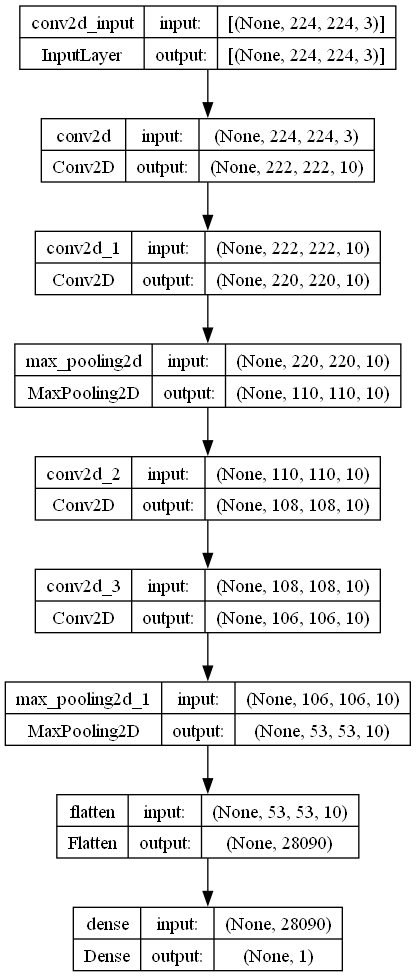

In [17]:
from tensorflow.keras.utils import plot_model
plot_model(model_1,show_shapes=True)

<Axes: title={'center': 'Evaluation Metrics'}>

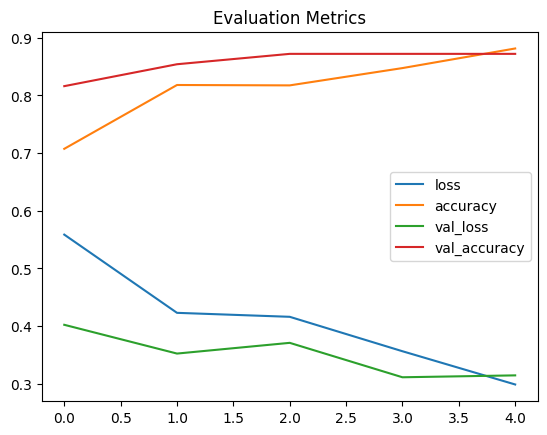

In [18]:
import pandas as pd
pd.DataFrame(history_1.history).plot(title="Evaluation Metrics")

## Using the same model as before

Let's replicate the model we've bulit in a previous section to see if it works our image data.

The model we're building is from [Tensorflow playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.22064&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [19]:
# Set the random seed
tf.random.set_seed(42)

# Create a model to replicate the Tensorflow Playground model
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )

# Fit the model
history_2=model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 4s 79ms/step - loss: 0.9090 - accuracy: 0.5080 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 4s 79ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 4s 77ms/step - loss: 0.6932 - accuracy: 0.4773 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 4s 84ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 98ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


<Axes: title={'center': 'Model_2 Eval metrics'}>

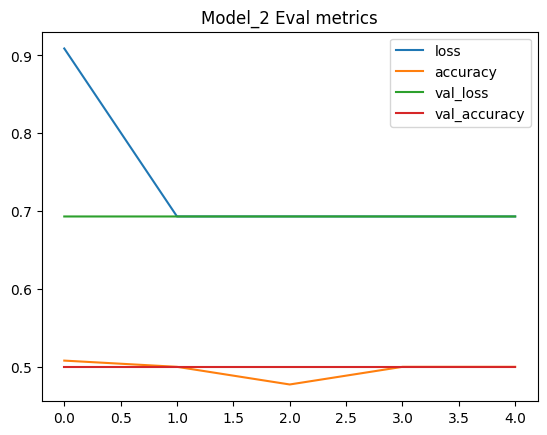

In [20]:
pd.DataFrame(history_2.history).plot(title="Model_2 Eval metrics")

In [21]:
# Check the summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more paramaters than our CNN model(*model_1*),model_2 performs terribly..let's try to improve it

In [24]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3=tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape=(224,224,3)),
     tf.keras.layers.Dense(100,activation="relu"),
     tf.keras.layers.Dense(100,activation="relu"),
     tf.keras.layers.Dense(100,activation="relu"),
     tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
histroy_3=model_3.fit(train_data,epochs=10,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/10
47/47 [==============================] - 5s 107ms/step - loss: 3.1291 - accuracy: 0.5980 - val_loss: 0.5050 - val_accuracy: 0.7620
Epoch 2/10
47/47 [==============================] - 4s 89ms/step - loss: 0.7397 - accuracy: 0.7073 - val_loss: 0.4663 - val_accuracy: 0.7820
Epoch 3/10
47/47 [==============================] - 4s 79ms/step - loss: 0.7253 - accuracy: 0.7093 - val_loss: 0.6712 - val_accuracy: 0.6940
Epoch 4/10
47/47 [==============================] - 4s 78ms/step - loss: 0.5238 - accuracy: 0.7713 - val_loss: 0.4559 - val_accuracy: 0.7800
Epoch 5/10
47/47 [==============================] - 4s 79ms/step - loss: 0.6417 - accuracy: 0.7453 - val_loss: 0.4915 - val_accuracy: 0.7480
Epoch 6/10
47/47 [==============================] - 4s 76ms/step - loss: 0.4870 - accuracy: 0.7833 - val_loss: 0.4721 - val_accuracy: 0.7660
Epoch 7/10
47/47 [==============================] - 4s 77ms/step - loss: 0.4721 - accuracy: 0.7940 - val_loss: 0.5450 - val_accuracy: 0.7640
Epoch 8/10
4

In [25]:
# Let's check the summary of our model_3
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_8 (Dense)             (None, 100)               15052900  
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


<Axes: title={'center': 'History_3 Eval metrics'}>

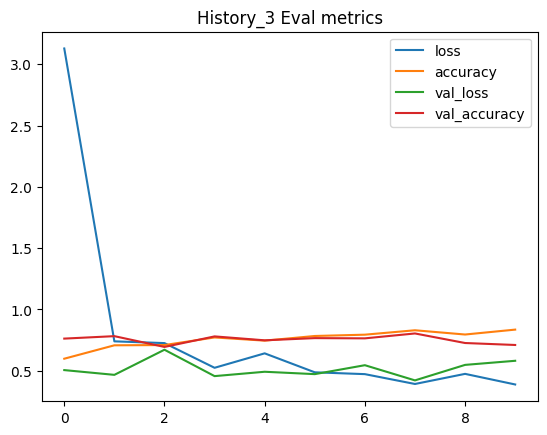

In [26]:
pd.DataFrame(histroy_3.history).plot(title="History_3 Eval metrics")

## Binary Classification:Let's break it down

1. Become one with the data(visualize,visualize,visualize)
2. Preprocess the data(prepared it for our model, the main step here was scaling/normalizing)
3. Created a model(start with a basline)
4. Fit the model
5. Evaluate the model
5. Adjust differnent parameters and improve the model(try to beat our baseline)
7. Repaet until satisfied(experiment,experiment,experiment)

### 1. Become one with the data

['3528458.jpg']
Image shape:(512, 512, 3)
['3426946.jpg']
Image shape:(512, 512, 3)


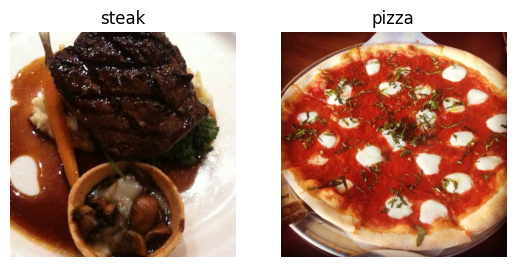

In [59]:
# Visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")